# Data Engineer - Cleaning  & Encoding
**This handles the preprocessing for the UNSW-NB15 dataset.**

**Task completed:**
- Merges all dataset parts into one DataFrame
- Drops duplicates and handles missing values
- Encodes categorical feautures using Label Encoding
- Saves the cleaned dataset as "UNSW_NB15_full.csv"
- Visualizes the label distribution

# Step 1: Import required Libraries 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# Step 2: Load and Merge Dataset Parts

In [24]:
# Load the already merged CSV
df = pd.read_csv('UNSW-NB15_full.csv')
print("Loaded dataset shape:", df.shape)


Loaded dataset shape: (2059418, 139)


# Step 3: Drop duplicates and Handle Missing Values 

In [25]:
# Separate categorical and numeric columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Fill missing values
df[cat_cols] = df[cat_cols].fillna("Unknown")
df[num_cols] = df[num_cols].fillna(0)

print("Missing values handled.")


Missing values handled.


# Step 4: Encode Categorical Columns

In [26]:
# Each categorical column gets encoded
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col].astype(str))

print("Categoricaal columns encoded individually.")


Categoricaal columns encoded individually.


# Step 5: Convert and Scale Numeric Data

In [ ]:
# Convert numeric-like columns to numbers 
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # leave non-numeric/categorical columns as-is

print("Numeric columns converted and ready for scaling.")



Numeric columns converted and ready for scaling.


# Step 6: Split Data & Visualize Label Distribution

Training set shape: (1441592, 138)
Testing set shape: (617826, 138)


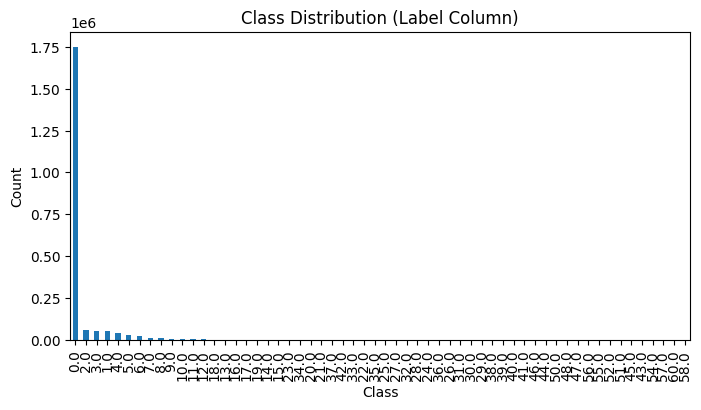

In [28]:
# Split into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Visualize label distribution
plt.figure(figsize=(8,4))
y.value_counts().plot(kind='bar')
plt.title('Class Distribution (Label Column)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
